In [2]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

def generate_random_dataframe(num_rows):
    # 0부터 2000 내에서 거리 유지가 된다고 설정
    x_values = np.random.randint(0, 2001, size=num_rows)
    y_values = np.random.randint(0, 2001, size=num_rows)
    
    # DataFrame 생성
    df = pd.DataFrame({'X': x_values, 'Y': y_values})
    
    return df

# 사용자로부터 개수 입력 받기
num_rows = int(input("생성할 행의 개수를 입력하세요: "))

df = generate_random_dataframe(num_rows)
df

생성할 행의 개수를 입력하세요: 10


,X,Y
0,812,418
1,1514,865
2,1563,74
3,1712,995
4,1561,709
5,1620,394
6,805,100
7,1840,1383
8,1808,633
9,745,437


In [5]:
file_path = "City_Dataset/usca312_name.txt"

with open(file_path, "r") as file:
    lines = file.readlines()

nameList = [line.strip() for line in lines]
nameList

['Abilene, TX',
 'Akron, OH',
 'Albany, NY',
 'Albuquerque, NM',
 'Alert, NT',
 'Allentown, PA',
 'Amarillo, TX',
 'Anchorage, AK',
 'Ann Arbor, MI',
 'Asheville, NC',
 'Ashland, KY',
 'Atlanta, GA',
 'Atlantic City, NJ',
 'Augusta, GA',
 'Augusta, ME',
 'Austin, TX',
 'Bakersfield, CA',
 'Baltimore, MD',
 'Bangor, ME',
 'Baton Rouge, LA',
 'Battle Creek, MI',
 'Bay City, MI',
 'Beaumont, TX',
 'Belleville, ON',
 'Bellingham, WA',
 'Berkeley, CA',
 'Billings, MT',
 'Biloxi, MS',
 'Binghamtom, NY',
 'Birmingham, AL',
 'Bismarck, ND',
 'Bloomington, IL',
 'Boise, ID',
 'Boston, MA',
 'Bowling Green, KY',
 'Brandon, MB',
 'Brantford, ON',
 'Brattleboro, VT',
 'Bridgeport, CT',
 'Brockton, MA',
 'Buffalo, NY',
 'Burlington, ONT',
 'Burlington, VT',
 'Butte, MT',
 'Calgary, AB',
 'Cambridge, MA',
 'Canton, OH',
 'Carson City, NV',
 'Cedar Rapids, IA',
 'Central Islip, NY',
 'Champaign, IL',
 'Charleston, SC',
 'Charleston, WV',
 'Charlotte, NC',
 'Charlottetown, PE',
 'Chattanooga, TN',
 'C

In [6]:
df_codata = pd.read_csv("City_Dataset/usca312_coordinates.csv", header=None, names=['X', 'Y'])
df_codata.index = nameList
df_codata.shape

(312, 2)

In [7]:
df_codata

,X,Y
"Abilene, TX",-6890.91,2242.06
"Akron, OH",-5632.62,2838.55
"Albany, NY",-5096.27,2947.10
"Albuquerque, NM",-7369.09,2424.18
"Alert, NT",-4303.32,5701.62
...,...,...
"Yakima, WA",-8326.35,3220.01
"Yellowknife, NT",-7907.33,4315.91
"Youngstown, OH",-5572.55,2839.81
"Yuma, AZ",-7919.99,2261.17


In [8]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [9]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [10]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [11]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [12]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [13]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [14]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [25]:
def breed(parent1, parent2):
    child = [None] *len(parent1)  
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        child[i] = parent1[i]
        
    remaining = [city for city in parent2 if city not in child]
    index = 0
    for i in range(len(parent2)):
        if child[i] is None:
            child[i] = remaining[index]
            index += 1
            
    return child

In [16]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [17]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [18]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop


In [19]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [20]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

## Running the genetic algorithm

In [23]:
cityList = []

for i in range(len(df_codata)):
    X, Y = df_codata.values[i]
    cityList.append(City(x=int(X), y=int(Y)))

print(len(cityList))

312


In [27]:
#각 parameter의 변수 변경하셔도 무방합니다. -윤수-
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0., generations=100)

Initial distance: 452823.61186728434
Final distance: 308324.7644125952


[(-5450,2963),
 (-5554,3002),
 (-4469,3186),
 (-6264,2936),
 (-6035,2873),
 (-6589,2056),
 (-5125,2814),
 (-5523,2575),
 (-5164,2778),
 (-6039,2726),
 (-6081,3076),
 (-6156,2920),
 (-7843,3701),
 (-4752,3095),
 (-4927,2945),
 (-5142,2719),
 (-6389,3041),
 (-5058,2844),
 (-5096,2835),
 (-6910,2608),
 (-6550,2024),
 (-6502,2078),
 (-6155,2098),
 (-5693,2408),
 (-5732,2921),
 (-4937,2970),
 (-4917,2950),
 (-5014,3058),
 (-5463,2979),
 (-7372,3604),
 (-8452,3289),
 (-6379,2691),
 (-5925,2643),
 (-5997,2316),
 (-5577,2768),
 (-5522,2264),
 (-4934,2889),
 (-5271,2545),
 (-5081,2836),
 (-6744,2683),
 (-7650,3456),
 (-9613,4425),
 (-9332,4194),
 (-11428,4456),
 (-7907,4315),
 (-6193,2750),
 (-5913,2922),
 (-6538,2702),
 (-5712,1918),
 (-6146,2752),
 (-6632,2498),
 (-6444,3107),
 (-6906,3448),
 (-5531,1845),
 (-6171,3342),
 (-5622,2819),
 (-5485,3014),
 (-6231,2231),
 (-6094,2771),
 (-5704,2459),
 (-6364,3232),
 (-6737,2450),
 (-7513,2454),
 (-6049,2623),
 (-4567,1276),
 (-7500,2699),
 (-7369,2

## Plot the improvement

In [28]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
        
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]

    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    return bestRoute

Initial distance: 449975.0371613019
Final distance: 289150.2949187925


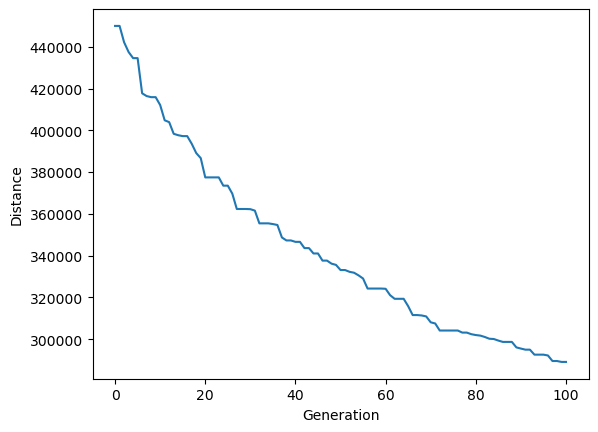

[(-6502,2078),
 (-5622,3355),
 (-6498,4058),
 (-4149,3189),
 (-5124,2827),
 (-5571,2789),
 (-5790,2758),
 (-6506,3148),
 (-7907,4315),
 (-8163,2359),
 (-5261,2974),
 (-4361,3198),
 (-6363,3228),
 (-6530,2562),
 (-5554,3002),
 (-5142,2719),
 (-4889,2976),
 (-4927,2945),
 (-8380,2622),
 (-5585,2434),
 (-5523,2575),
 (-5030,2870),
 (-4388,3101),
 (-4942,2985),
 (-4961,2920),
 (-4552,3131),
 (-4932,3371),
 (-4934,2889),
 (-6322,3096),
 (-6432,3105),
 (-6081,3076),
 (-6190,2811),
 (-9013,3750),
 (-8511,3399),
 (-8476,3145),
 (-5531,1845),
 (-6477,2247),
 (-8448,2616),
 (-6156,2920),
 (-7132,3045),
 (-6039,2726),
 (-6379,2691),
 (-6446,2571),
 (-5650,1696),
 (-6083,2120),
 (-5599,2349),
 (-4854,3016),
 (-5108,2958),
 (-5485,3014),
 (-4597,3169),
 (-5490,3208),
 (-4916,2881),
 (-5463,2979),
 (-6298,2104),
 (-5640,2649),
 (-6910,2608),
 (-6933,3065),
 (-6660,2936),
 (-5919,2968),
 (-3644,3290),
 (-5125,2814),
 (-5533,2910),
 (-5362,2981),
 (-6149,2797),
 (-6264,2936),
 (-5341,3053),
 (-5014,30

In [29]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0, generations=100)